In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [5]:
df.shape

(100, 4)

In [7]:
df = df.iloc[:,1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


# **EDA(Exloitory Data Analysis)**

In [9]:
import matplotlib.pyplot as plt

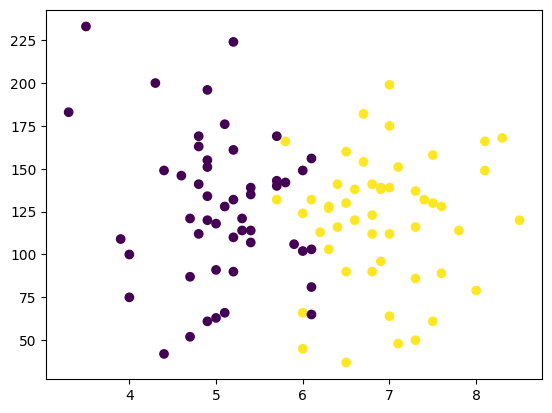

In [12]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

# **1. Extract input and output cols**

In [13]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [14]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [15]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [16]:
y.shape

(100,)

# **3. Train test split**

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [19]:
X_train

,cgpa,iq
92,5.2,110.0
91,7.5,158.0
32,7.0,139.0
96,4.4,42.0
50,3.5,233.0
...,...,...
3,7.4,132.0
37,8.1,149.0
43,6.8,141.0
19,5.2,132.0


In [20]:
y_train

,placement
92,0
91,1
32,1
96,0
50,0
...,...
3,1
37,1
43,1
19,0


In [21]:
X_test

,cgpa,iq
8,6.1,156.0
66,6.9,96.0
48,6.6,138.0
60,6.9,139.0
34,4.8,163.0
78,6.1,81.0
88,4.4,149.0
86,5.1,128.0
26,7.0,199.0
17,3.3,183.0


# **2. Scale the values**

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)

In [26]:
X_train

array([[-0.72845933, -0.2869782 ],
       [ 1.31201538,  0.92135106],
       [ 0.86843392,  0.44305406],
       [-1.43818967, -1.99877798],
       [-2.23663629,  2.80936553],
       [ 0.42485246, -2.12464561],
       [ 0.42485246,  0.97169811],
       [-0.28487787,  0.26683938],
       [-1.17204079, -0.01006941],
       [ 0.0699873 , -1.41978688],
       [-0.28487787,  1.19825985],
       [ 0.42485246,  0.21649233],
       [-0.99460821, -1.52048098],
       [-0.19616158,  0.51857464],
       [ 1.1345828 , -1.79738977],
       [-1.0833245 ,  1.19825985],
       [-0.90589191, -0.7652752 ],
       [-0.72845933, -0.79044872],
       [ 0.69100134,  0.04027764],
       [ 1.57816426, -0.18628409],
       [-1.0833245 ,  0.49340111],
       [ 0.24741988, -0.46319288],
       [-0.63974304, -0.01006941],
       [-0.10744529, -0.3876723 ],
       [ 0.24741988,  0.14097175],
       [-0.99460821,  0.74513638],
       [-0.55102675,  0.44305406],
       [ 0.33613617, -0.13593704],
       [ 1.40073168,

In [27]:
X_test = scaler.transform(X_test)

In [28]:
X_test

array([[ 0.0699873 ,  0.87100401],
       [ 0.77971763, -0.63940757],
       [ 0.51356876,  0.41788054],
       [ 0.77971763,  0.44305406],
       [-1.0833245 ,  1.04721869],
       [ 0.0699873 , -1.01701046],
       [-1.43818967,  0.69478932],
       [-0.81717562,  0.16614527],
       [ 0.86843392,  1.95346563],
       [-2.41406888,  1.55068921]])

# **4. Train the model**

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
clf = LogisticRegression()

In [36]:
#Model training
clf.fit(X_train,y_train)

LogisticRegression()

# **5. Evaluate the model/model selection**

In [39]:
y_pred = clf.predict(X_test)

In [38]:
y_test

,placement
8,0
66,1
48,1
60,1
34,0
78,0
88,0
86,0
26,1
17,0


In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_test,y_pred)

0.8

#mlxtend plot decision boundary
#https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

In [44]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

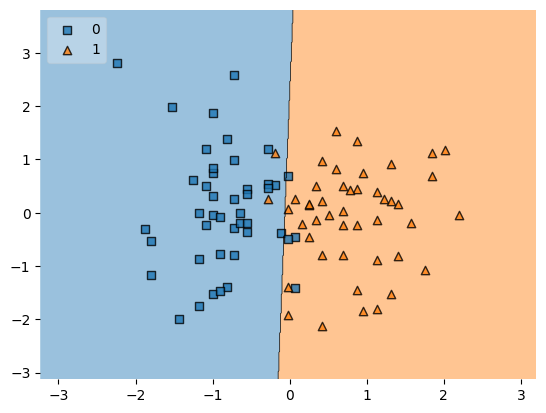

In [46]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [47]:
import pickle

In [48]:
pickle.dump(clf,open('model.pkl','wb'))

In [ ]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model